In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.io
def morsetrans(x,K,ga,be,method='bandwidth' ):
    filename='../morse_g{:.2f}_b{:.2f}_{}.mat'.format(ga,be,method)
    W=scipy.io.loadmat(filename)['W']
    assert(K<5)
    W=W[:,:,K]
    print filename,W.shape,W.dtype,np.sum(W)
    X=np.fft.fft(x)
    print X.shape,X.dtype ,X.sum()
    print np.sum(X.reshape([-1,1])*W)
    return np.fft.ifft( X.reshape([-1,1])*W,axis=0).T;

In [3]:
#morsewave(16000, 3, 2,fs,method='bandpass')

In [4]:
import soundfile  
filename='/home/bo/mydev/tsrc2017/input/train/audio/happy/0132a06d_nohash_0.wav'
x,_=soundfile.read(filename)
x.shape

(16000,)

In [5]:
len(x),sum(x)

(16000, 0.74755859375)

In [9]:
a=morsetrans(x,0, 3,1) 

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 76320.7147149
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-37.8338094563-134.859405404j)


In [11]:
a.dtype

dtype('complex128')

<IPython.core.display.Javascript object>


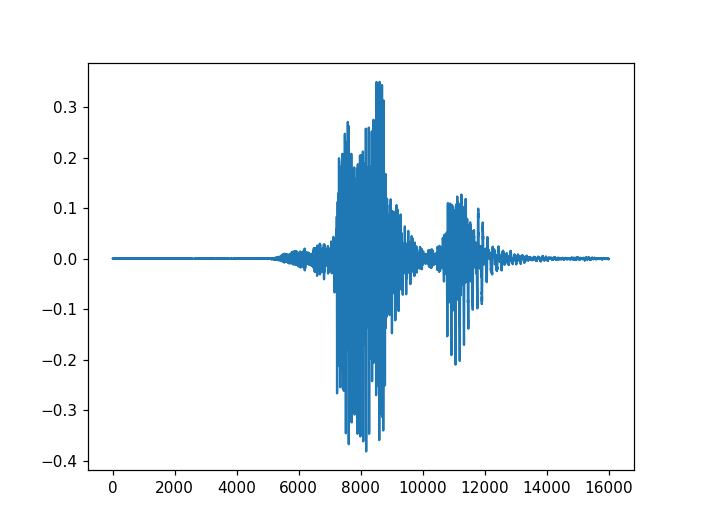

In [6]:
plt.figure(),plot(x);plt.show()

../morse_g3.00_b0.33_bandwidth.mat (16000, 32) float64 53573.9895222
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-60.8559702497-108.852130081j)
(32, 16000)


<IPython.core.display.Javascript object>


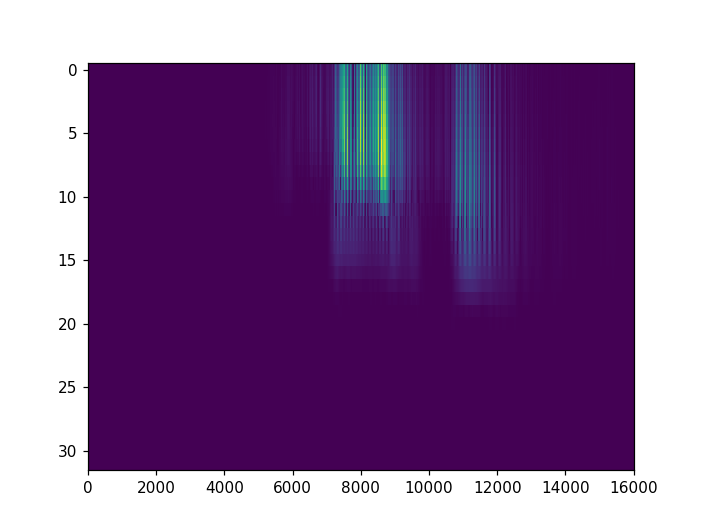

../morse_g3.00_b0.33_bandwidth.mat (16000, 32) float64 -22467.8241841
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-40.7951224706-22.2842225681j)
(32, 16000)


<IPython.core.display.Javascript object>


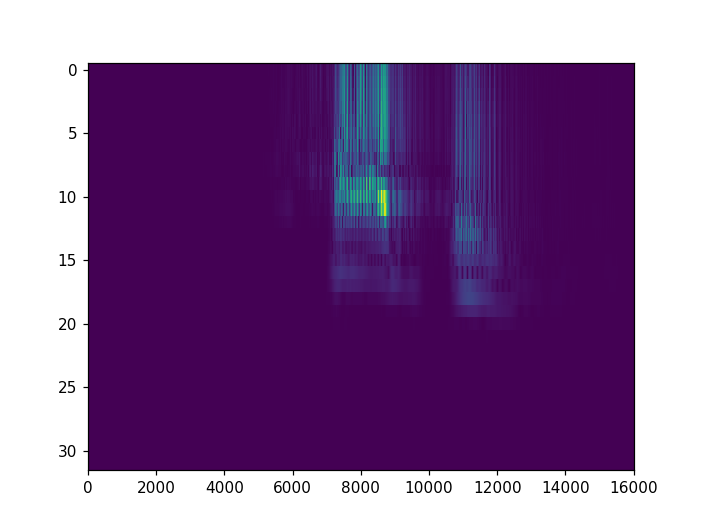

../morse_g3.00_b0.33_bandwidth.mat (16000, 32) float64 22156.575168
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-33.8456343461-40.2928965243j)
(32, 16000)


<IPython.core.display.Javascript object>


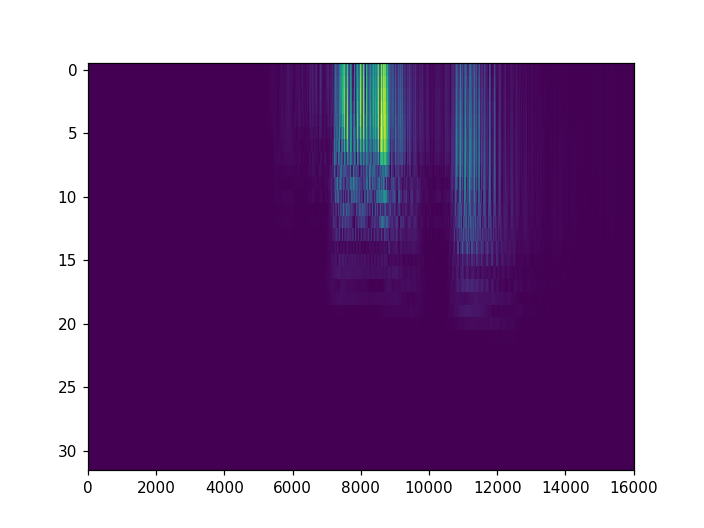

(32, 16000)


In [7]:
lst=[]
lst2=[]

for K in range(3):
    a=morsetrans(x,K, 3,0.33)
    lst.append(a)
    b=np.log1p(np.abs(a))
    print b.shape
    plt.figure();imshow(b,aspect='auto');plt.show()
    lst2.append(b)
a=np.sum(lst,0)
b=np.log1p(np.abs(a))
print b.shape
imshow(b,aspect='auto');plt.show()


In [8]:
 np.sort(b.reshape([-1]))[-100:].mean()

0.54035568506715981

<IPython.core.display.Javascript object>


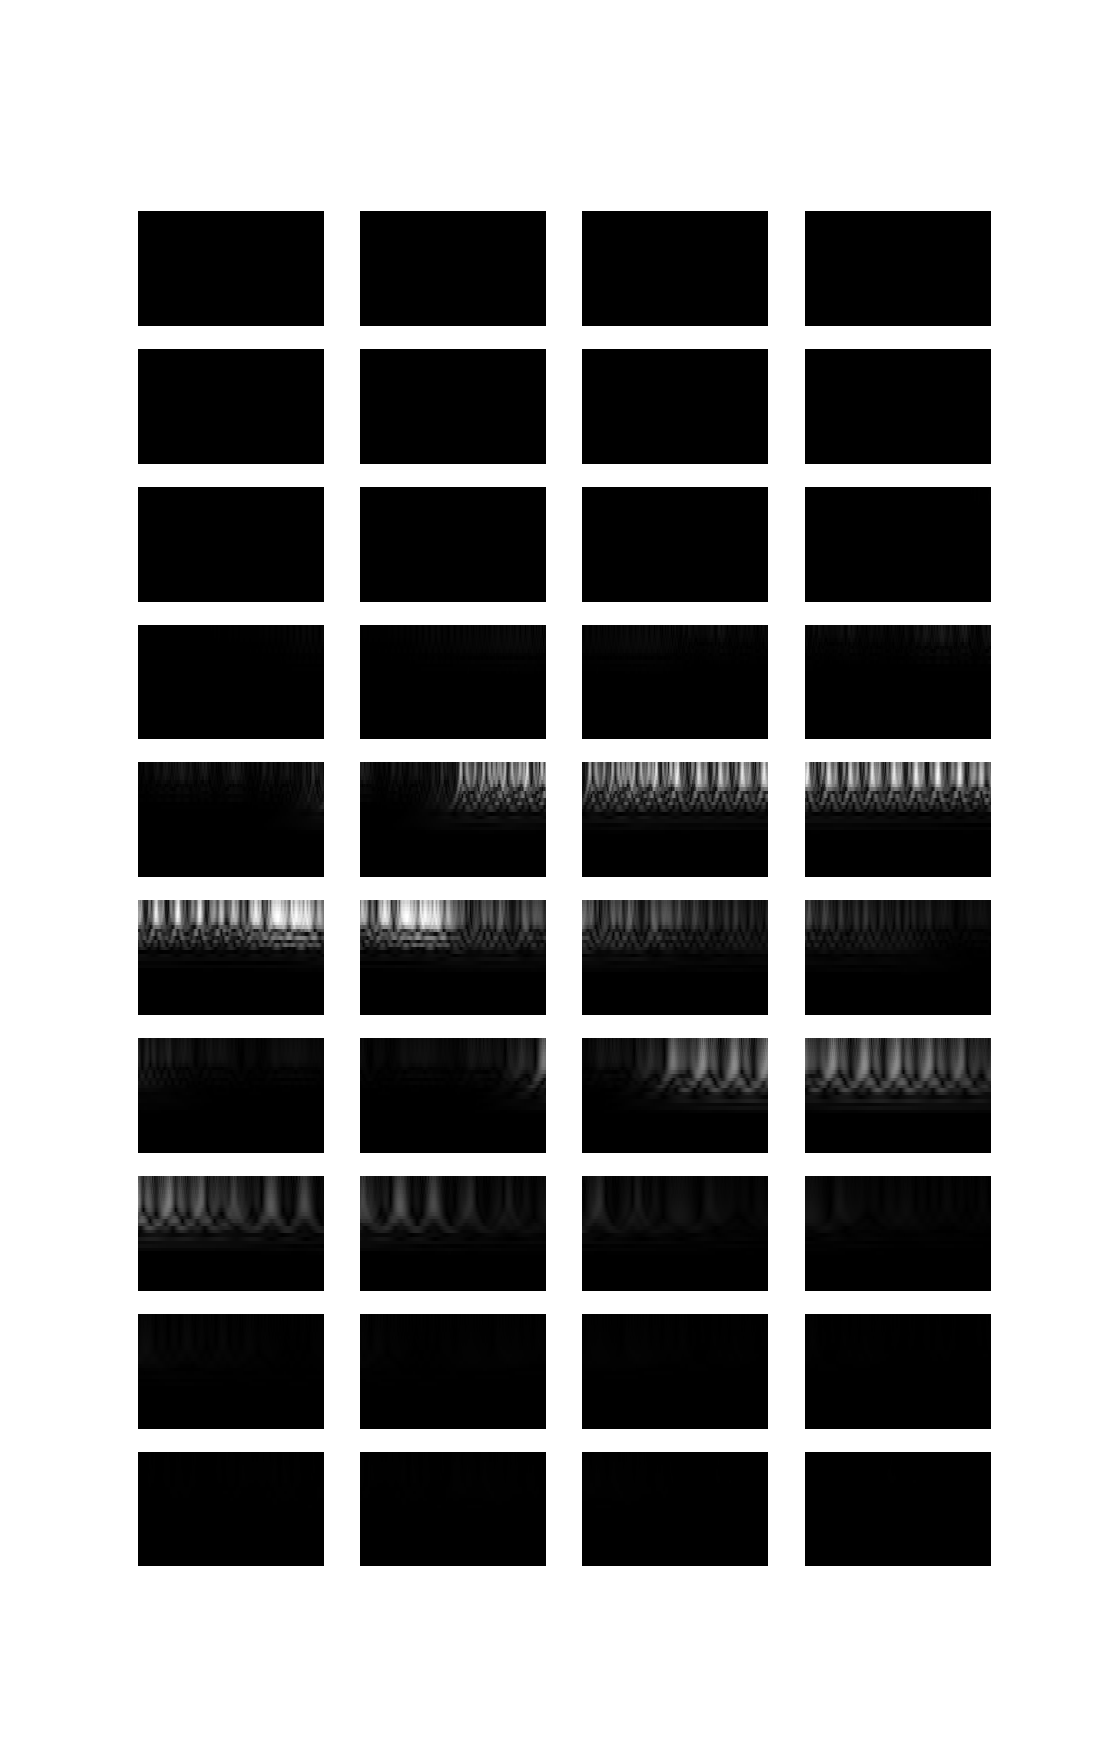

0.000168836279054 0.000130245656638
0 0 1 1
0.000194782455036 0.000166112205799
0 0 1 2
0.000212511354411 0.00017735635564
0 0 1 3
0.000174183521576 0.000146442161542
0 0 1 4
0.000157837571541 0.000135903187786
0 0 2 1
0.000165638120779 0.000142082039585
0 0 2 2
0.000153796640407 0.000133991325114
0 0 2 3
0.000124663546789 0.000108638647148
0 0 2 4
0.000116686867894 0.000102405390105
0 0 3 1
0.000128036827616 0.000118257069833
0 0 3 2
0.000152929988039 0.000143511049262
0 0 3 3
0.000228681684814 0.000311930270939
0 1 3 4
0.000998665010895 0.00236539137988
0 8 4 1
0.00316717136437 0.00544436941366
0 12 4 2
0.00415356868311 0.0066721349958
0 21 4 3
0.0050833277189 0.00952014845379
0 30 4 4
0.00868449912199 0.0142614005505
0 51 5 1
0.0428808593962 0.0802066602
0 229 5 2
0.077021604546 0.108933334487
0 238 5 3
0.078767882856 0.114977371233
0 251 5 4
0.0960410228534 0.139510155795
0 255 6 1
0.0814767200005 0.124068500451
0 255 6 2
0.0385119820167 0.0501704722181
0 121 6 3
0.0205697677977 0.

In [9]:
plt.figure(figsize=(10,16))
M2=400
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

In [11]:
from skimage.transform import resize
from PIL import Image
import PIL

In [12]:
a=Image.fromarray(bb)
print a.size
a=a.resize((119, 119))
a.size

(400, 51)


(119, 119)

<IPython.core.display.Javascript object>


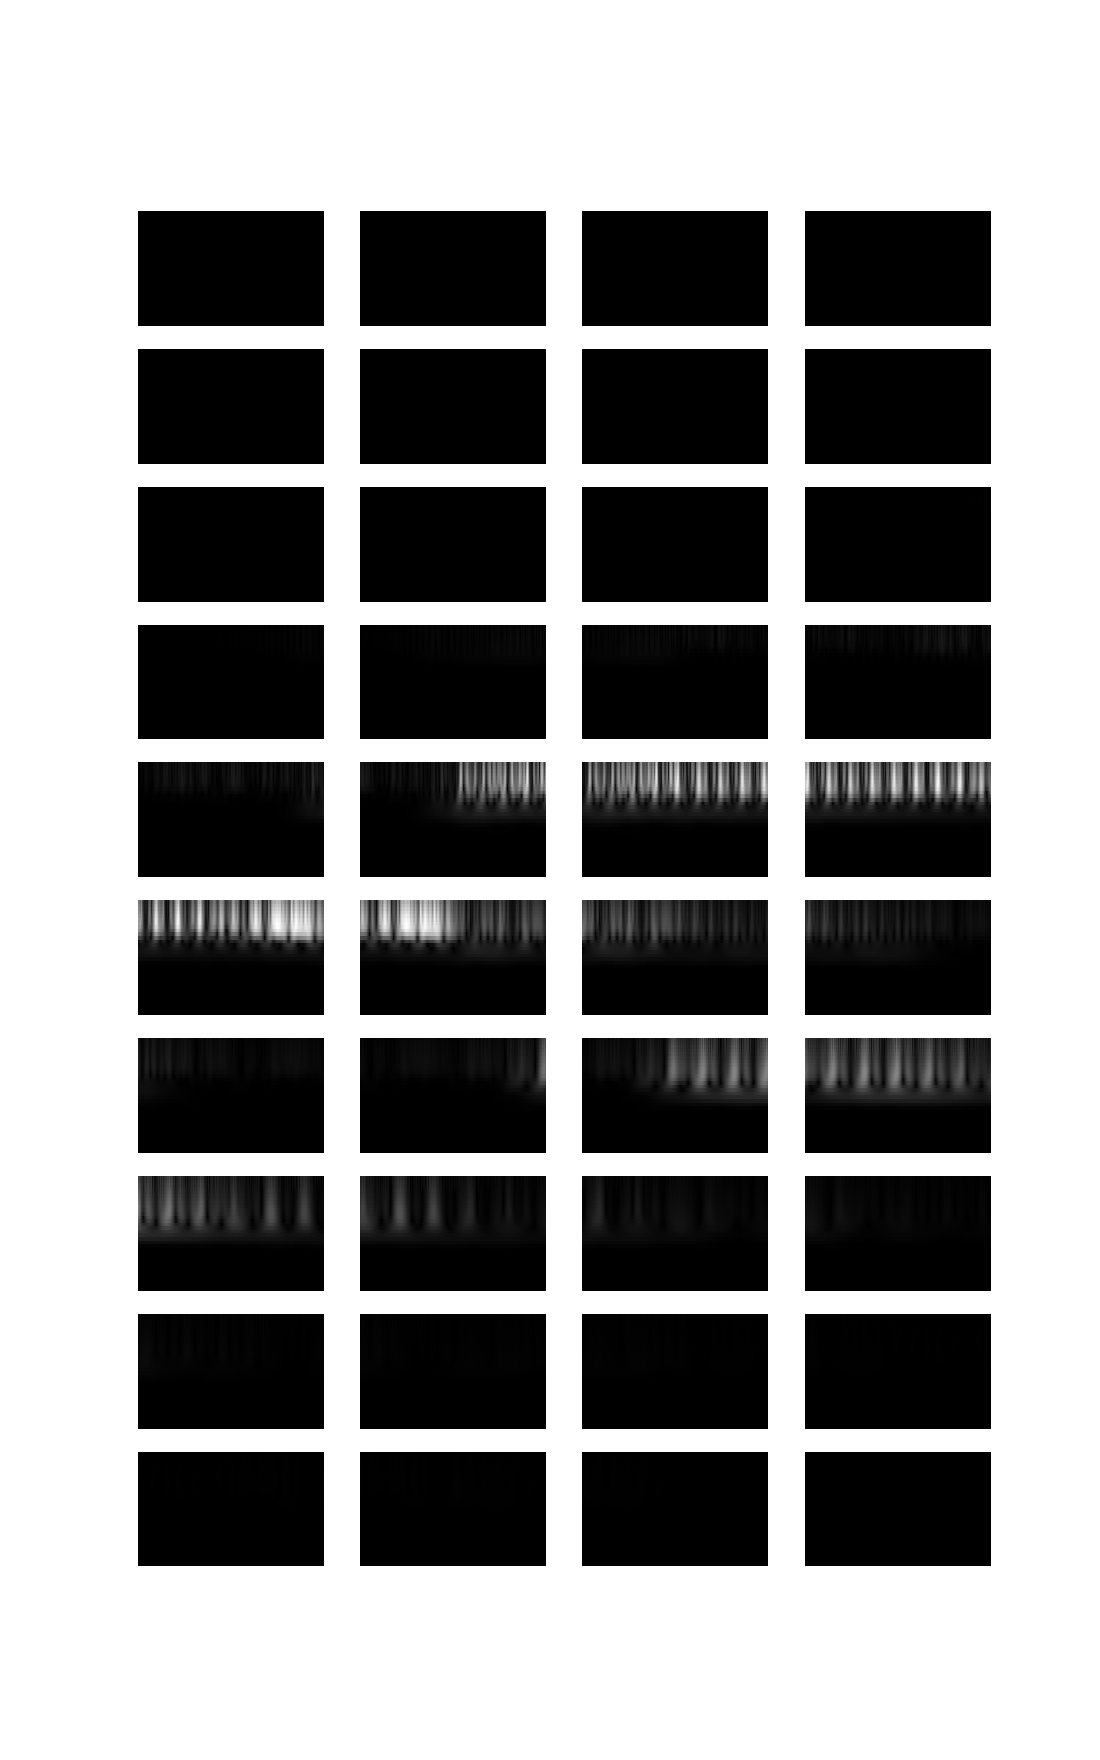

8.33051550964e-05 6.6295144175e-05
0 0 1 1
25600
9.90589885743e-05 8.57842427791e-05
0 0 1 2
25600
0.000109588310292 9.07153289959e-05
0 0 1 3
25600
9.10576008218e-05 7.65504641855e-05
0 0 1 4
25600
8.29376326501e-05 7.1800686331e-05
0 0 2 1
25600
8.59682260705e-05 7.36969410164e-05
0 0 2 2
25600
8.0260213534e-05 7.01798594074e-05
0 0 2 3
25600
6.53458501253e-05 5.83947154762e-05
0 0 2 4
25600
6.15391439511e-05 5.49588038705e-05
0 0 3 1
25600
6.84499110862e-05 6.40844766107e-05
0 0 3 2
25600
8.09877712022e-05 7.66117254428e-05
0 0 3 3
25600
0.00012367236989 0.000170904544632
0 1 3 4
25600
0.000551580470848 0.00127743413161
0 7 4 1
25600
0.0017081528 0.00287601648342
0 11 4 2
25600
0.00230537204419 0.00366679614981
0 18 4 3
25600
0.00290134328061 0.00535291002328
0 26 4 4
25600
0.00468777935805 0.00773113912664
0 46 5 1
25600
0.0245178863706 0.0450549972543
0 228 5 2
25600
0.0445344318348 0.0611895711402
0 237 5 3
25600
0.0451139357756 0.06507541151
0 250 5 4
25600
0.0553401015366 0.079

In [12]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[0]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


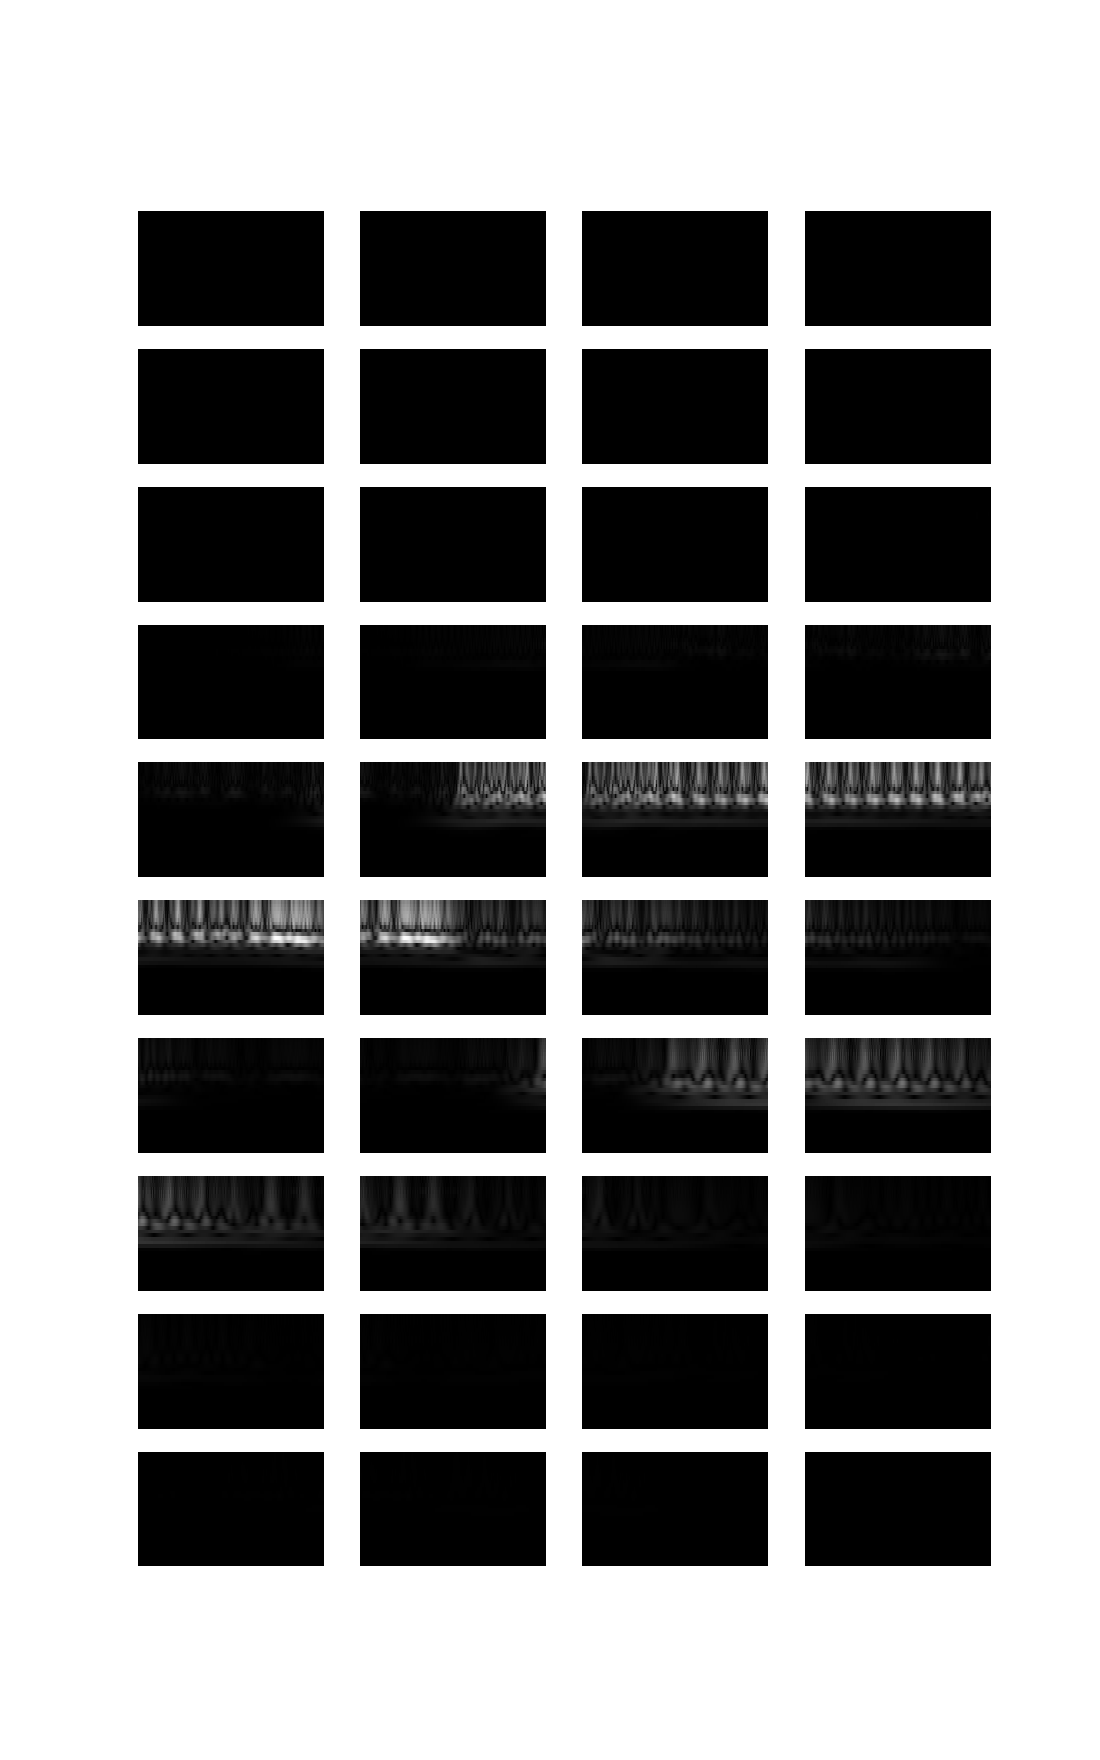

7.29739447109e-05 5.42995390757e-05
0 0 1 1
25600
8.03992190082e-05 6.46074839517e-05
0 0 1 2
25600
8.84462906012e-05 6.95898543178e-05
0 0 1 3
25600
7.50931277833e-05 5.96185950875e-05
0 0 1 4
25600
6.83458799071e-05 5.54309686681e-05
0 0 2 1
25600
7.05564434585e-05 5.63911680311e-05
0 0 2 2
25600
6.62405641131e-05 5.36344947699e-05
0 0 2 3
25600
5.49133816239e-05 4.57355247058e-05
0 0 2 4
25600
5.17088810702e-05 4.26900632875e-05
0 0 3 1
25600
5.72304169248e-05 5.02058847608e-05
0 0 3 2
25600
6.72279283056e-05 6.02245641494e-05
0 0 3 3
25600
0.000101704600702 0.000131447644037
0 1 3 4
25600
0.000471224305395 0.000987843494342
0 6 4 1
25600
0.00142194768426 0.00222958665729
0 10 4 2
25600
0.0019646715271 0.00284209724643
0 14 4 3
25600
0.00256128751185 0.00417443740302
0 21 4 4
25600
0.00413791179951 0.00609280391943
0 35 5 1
25600
0.0214078555992 0.0356595602076
0 191 5 2
25600
0.0386800306598 0.0470424851224
0 191 5 3
25600
0.039476916702 0.0500707337955
0 189 5 4
25600
0.0475434737

In [13]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[1]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()